https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv('dataset/news_sentiment_augmented_google.csv').drop(['Unnamed: 0'], axis=1)

In [6]:
df['Middle'] = (df['Low'] + df['High']) / 2
df

Date  data_channel_is_lifestyle  data_channel_is_entertainment  \
0    2013-01-07                   0.101266                       0.088608   
1    2013-01-08                   0.083333                       0.166667   
2    2013-01-09                   0.134831                       0.191011   
3    2013-01-10                   0.125000                       0.187500   
4    2013-01-11                   0.098039                       0.137255   
..          ...                        ...                            ...   
493  2014-12-19                   0.067568                       0.121622   
494  2014-12-22                   0.097222                       0.097222   
495  2014-12-23                   0.049180                       0.163934   
496  2014-12-24                   0.057692                       0.115385   
497  2014-12-26                   0.073171                       0.073171   

     data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
0               0.113924                0.050633              0.455696   
1               0.083333                0.000000              0.416667   
2               0.112360                0.033708              0.235955   
3               0.200000                0.012500              0.237500   
4               0.078431                0.058824              0.333333   
..                   ...                     ...                   ...   
493             0.121622                0.040541              0.081081   
494             0.125000                0.013889              0.083333   
495             0.032787                0.016393              0.131148   
496             0.076923                0.057692              0.115385   
497             0.097561                0.000000              0.121951   

     data_channel_is_world  global_subjectivity  global_sentiment_polarity  \
0                 0.113924             0.480690                   0.176541   
1                 0.166667             0.455641                   0.161938   
2                 0.123596             0.467116                   0.145615   
3                 0.062500             0.462260                   0.156578   
4                 0.156863             0.480836                   0.166839   
..                     ...                  ...                        ...   
493               0.432432             0.349775                   0.093596   
494               0.319444             0.384586                   0.092461   
495               0.377049             0.377784                   0.065058   
496               0.423077             0.352430                   0.079892   
497               0.463415             0.383164                   0.085894   

     global_rate_positive_words  ...  abs_title_subjectivity  \
0                      0.052167  ...                0.329081   
1                      0.048414  ...                0.338889   
2                      0.046497  ...                0.385071   
3                      0.047305  ...                0.389721   
4                      0.043516  ...                0.329093   
..                          ...  ...                     ...   
493                    0.029660  ...                0.340203   
494                    0.029623  ...                0.335687   
495                    0.030542  ...                0.316924   
496                    0.027218  ...                0.363923   
497                    0.028703  ...                0.305868   

     abs_title_sentiment_polarity       shares    Open    High     Low  \
0                        0.176808  2004.556962  367.72  369.69  365.29   
1                        0.102778  1493.583333  367.77  368.15  362.22   
2                        0.159139  2536.303371  366.50  369.18  364.30   
3                        0.096425  2085.200000  371.42  372.50  366.75   
4                        0.186686  3621.843137  371.00  371.22  368.15   
..                            ...          ... 

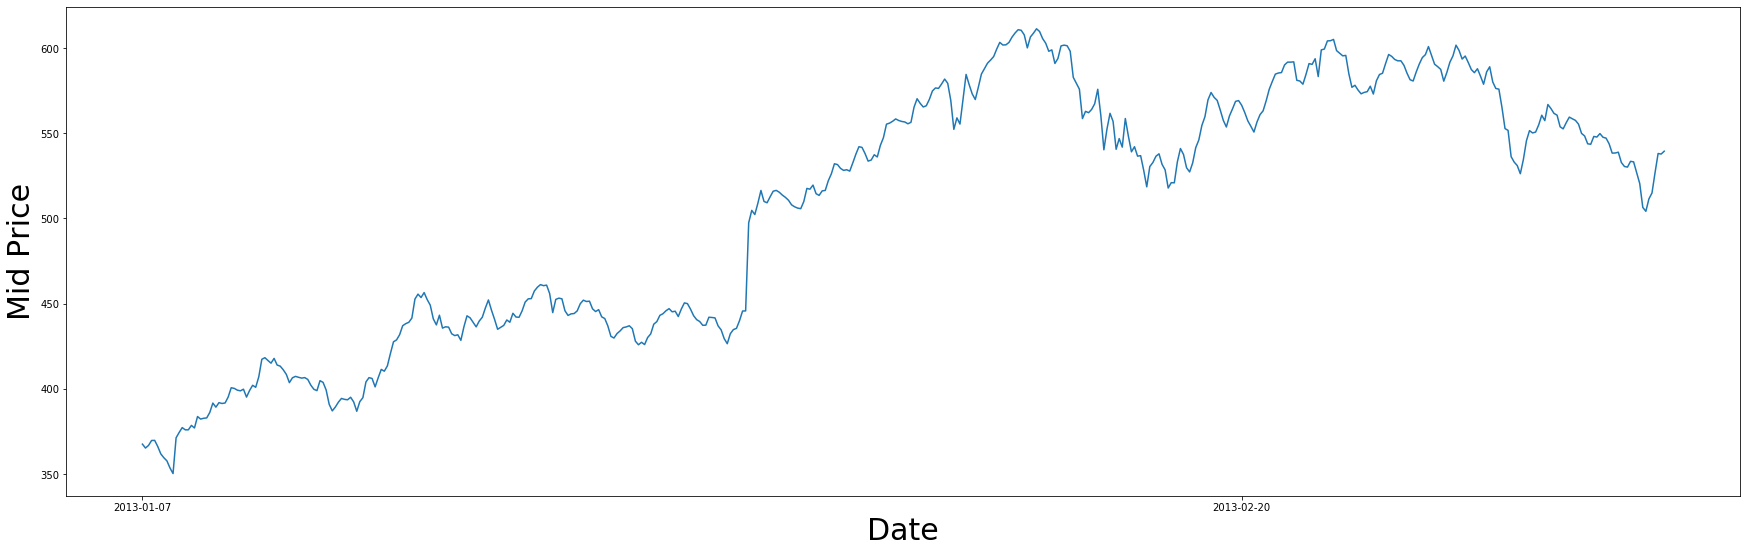

In [7]:
plt.figure(figsize = (30,9))
plt.plot(range(df.shape[0]), df['Middle'])
plt.xticks(range(0, df.shape[0], 359), df['Date'].loc[::30])
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.show()

In [8]:
df = df.drop(['Date'], axis=1)

In [9]:
training_data = df[:300]
validation_data = df[300:400]
testing_data = df[400:]

training_data

data_channel_is_lifestyle  data_channel_is_entertainment  \
0                     0.101266                       0.088608   
1                     0.083333                       0.166667   
2                     0.134831                       0.191011   
3                     0.125000                       0.187500   
4                     0.098039                       0.137255   
..                         ...                            ...   
295                   0.048387                       0.145161   
296                   0.032787                       0.163934   
297                   0.031250                       0.140625   
298                   0.000000                       0.078431   
299                   0.050847                       0.067797   

     data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
0               0.113924                0.050633              0.455696   
1               0.083333                0.000000              0.416667   
2               0.112360                0.033708              0.235955   
3               0.200000                0.012500              0.237500   
4               0.078431                0.058824              0.333333   
..                   ...                     ...                   ...   
295             0.096774                0.048387              0.241935   
296             0.229508                0.032787              0.163934   
297             0.171875                0.046875              0.218750   
298             0.196078                0.058824              0.117647   
299             0.118644                0.101695              0.254237   

     data_channel_is_world  global_subjectivity  global_sentiment_polarity  \
0                 0.113924             0.480690                   0.176541   
1                 0.166667             0.455641                   0.161938   
2                 0.123596             0.467116                   0.145615   
3                 0.062500             0.462260                   0.156578   
4                 0.156863             0.480836                   0.166839   
..                     ...                  ...                        ...   
295               0.241935             0.449543                   0.108921   
296               0.262295             0.453458                   0.109253   
297               0.234375             0.441970                   0.100906   
298               0.176471             0.457235                   0.116493   
299               0.288136             0.465516                   0.125014   

     global_rate_positive_words  global_rate_negative_words  ...  \
0                      0.052167                    0.015850  ...   
1                      0.048414                    0.015218  ...   
2                      0.046497                    0.015021  ...   
3                      0.047305                    0.017239  ...   
4                      0.043516                    0.016712  ...   
..                          ...                         ...  ...   
295                    0.040155                    0.019476  ...   
296                    0.040083                    0.018808  ...   
297                    0.037052                    0.017163  ...   
298                    0.036585                    0.017200  ...   
299                    0.039244                    0.016812  ...   

     abs_title_subjectivity  abs_title_sentiment_polarity       shares  \
0                  0.329081                      0.176808  2004.556962   
1                  0.338889                      0.102778  1493.583333   
2                  0.385071                      0.159139  2536.303371   
3                  0.389721                      0.096425  2085.200000   
4                  0.329093                      0.186686  3621.843137   
..                      ...                           ...          ...   
295                0.307310                      0.184524  4981

In [10]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = pd.DataFrame(sc.fit_transform(training_data),
              columns=training_data.columns,
              dtype='float64')
validation_data_scaled = pd.DataFrame(sc.transform(validation_data),
              columns=validation_data.columns,
              dtype='float64')
testing_data_scaled = pd.DataFrame(sc.transform(testing_data),
              columns=testing_data.columns,
              dtype='float64')

In [11]:
training_data_scaled

data_channel_is_lifestyle  data_channel_is_entertainment  \
0                     0.543153                       0.227605   
1                     0.446970                       0.512821   
2                     0.723187                       0.601772   
3                     0.670455                       0.588942   
4                     0.525847                       0.405354   
..                         ...                            ...   
295                   0.259531                       0.434243   
296                   0.175857                       0.502837   
297                   0.167614                       0.417668   
298                   0.000000                       0.190422   
299                   0.272727                       0.151565   

     data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
0               0.197980                0.199553              0.787121   
1               0.103237                0.000000              0.710903   
2               0.193135                0.132849              0.358002   
3               0.464567                0.049265              0.361019   
4               0.088055                0.231834              0.548166   
..                   ...                     ...                   ...   
295             0.144865                0.190702              0.369681   
296             0.555957                0.129219              0.217357   
297             0.377461                0.184743              0.324403   
298             0.452421                0.231834              0.126965   
299             0.212598                0.400798              0.393704   

     data_channel_is_world  global_subjectivity  global_sentiment_polarity  \
0                 0.265384             0.801997                   0.838543   
1                 0.404290             0.518249                   0.697056   
2                 0.290855             0.648240                   0.538887   
3                 0.129950             0.593227                   0.645117   
4                 0.378470             0.803652                   0.744541   
..                     ...                  ...                        ...   
295               0.602523             0.449170                   0.183346   
296               0.656143             0.493522                   0.186564   
297               0.582611             0.363386                   0.105685   
298               0.430111             0.536312                   0.256711   
299               0.724199             0.630113                   0.339273   

     global_rate_positive_words  global_rate_negative_words  ...  \
0                      1.000000                    0.286567  ...   
1                      0.798920                    0.219626  ...   
2                      0.696144                    0.198793  ...   
3                      0.739473                    0.433560  ...   
4                      0.536400                    0.377849  ...   
..                          ...                         ...  ...   
295                    0.356334                    0.670336  ...   
296                    0.352439                    0.599635  ...   
297                    0.190029                    0.425558  ...   
298                    0.165015                    0.429428  ...   
299                    0.307493                    0.388371  ...   

     abs_title_subjectivity  abs_title_sentiment_polarity    shares      Open  \
0                  0.591883                      0.529864  0.032107  0.058995   
1                  0.642715                      0.143875  0.000000  0.059187   
2                  0.882067                      0.437738  0.065519  0.054318   
3                  0.906167                      0.110753  0.037174  0.073178   
4                  0.591947                      0.581366  0.133728  0.071568   
..                      ...                           ...       ...       ...   
295           

In [20]:
def create_dataset(dataset):
    dataY = dataset['Middle']
    dataX = dataset.drop(['Middle'], axis = 1)
    return dataX, dataY

In [23]:
trainX, trainY = create_dataset(training_data_scaled)
validX, validY = create_dataset(validation_data_scaled)
testX, testY = create_dataset(testing_data_scaled)

In [58]:
# We use residual sum of squares (RSS) as a splitting mechanic to decide which feature
# is the most prominent at each level. Note that we are adding the squared residual sums of both
# the left and right side of the nodes of each branch.
def rss(y_left, y_right):
    return np.sum((y_left - np.mean(y_left)) ** 2) + np.sum((y_right - np.mean(y_right)) ** 2)

In [61]:
def find_best_rule(X_train, y_train):
    best_feature, best_threshold, min_rss = None, None, np.inf
    for feature in X_train.columns:
        thresholds = X_train[feature].unique().tolist()
        thresholds.sort()
        thresholds = thresholds[1:]
        for t in thresholds:
            y_left_ix = X_train[feature] < t
            y_left, y_right = y_train[y_left_ix], y_train[~y_left_ix]
            t_rss = rss(y_left, y_right)
            print(t_rss, t_rss2)
            if t_rss < min_rss:
                min_rss = t_rss
                best_threshold = t
                best_feature = feature
    
    return {'feature': best_feature, 'threshold': best_threshold}

In [41]:
def split(X_train, y_train, depth, max_depth):
    if depth == max_depth or len(X_train) < 2:
        return {'prediction': np.mean(y_train)}
    
    rule = find_best_rule(X_train, y_train)
    left_ix = X_train[rule['feature']] < rule['threshold']
    rule['left'] = split(X_train[left_ix], y_train[left_ix], depth + 1, max_depth)
    rule['right'] = split(X_train[~left_ix], y_train[~left_ix], depth + 1, max_depth)
    return rule

In [62]:
rules2 = split(trainX, trainY, 0, 10)
rules2

20.409748953599948 21.551533541745734
20.161325840759204 21.551533541745734
19.93688422689315 21.551533541745734
20.390710020045965 21.551533541745734
20.600634963116374 21.551533541745734
20.687912720436508 21.551533541745734
20.753419866635564 21.551533541745734
20.684843376497877 21.551533541745734
20.765247942125725 21.551533541745734
20.82812217769638 21.551533541745734
20.728663445562436 21.551533541745734
20.665286419453494 21.551533541745734
20.571387868703056 21.551533541745734
20.34766153999031 21.551533541745734
20.416217530165717 21.551533541745734
20.342159634787386 21.551533541745734
20.422341988078227 21.551533541745734
20.249857291417666 21.551533541745734
20.303777341354614 21.551533541745734
20.28642039763751 21.551533541745734
20.355044256536445 21.551533541745734
20.43006128670061 21.551533541745734
20.330610990479816 21.551533541745734
20.38287740040182 21.551533541745734
20.27034087577711 21.551533541745734
20.397660643353063 21.551533541745734
20.393931600560162 

21.214099081136702 21.551533541745734
21.174451306608667 21.551533541745734
21.151200760702455 21.551533541745734
21.100583891549107 21.551533541745734
21.0799185152979 21.551533541745734
21.00441771148646 21.551533541745734
20.93841065449725 21.551533541745734
21.035451198381722 21.551533541745734
21.068653972558618 21.551533541745734
21.0544986085224 21.551533541745734
21.038339868144913 21.551533541745734
21.01537686185288 21.551533541745734
20.99242993186926 21.551533541745734
20.88229939812864 21.551533541745734
20.815046405916217 21.551533541745734
20.770133045075067 21.551533541745734
20.73508727203061 21.551533541745734
20.811225422437836 21.551533541745734
20.727584080620346 21.551533541745734
20.791636173209504 21.551533541745734
20.71584949030878 21.551533541745734
20.78556859967172 21.551533541745734
20.81648317108855 21.551533541745734
20.781364414674556 21.551533541745734
21.022925172546497 21.551533541745734
20.987807572872317 21.551533541745734
21.02219445180817 21.5515

21.432865898193782 21.551533541745734
21.45164625582433 21.551533541745734
21.441429952258616 21.551533541745734
21.46047176259667 21.551533541745734
21.492843225201234 21.551533541745734
21.51374438503604 21.551533541745734
21.540848152991728 21.551533541745734
21.50084359975247 21.551533541745734
21.409367719137787 21.551533541745734
21.36659177913162 21.551533541745734
21.41963153188171 21.551533541745734
21.377001596523296 21.551533541745734
21.391539452221448 21.551533541745734
21.40608311626783 21.551533541745734
21.258694344055517 21.551533541745734
21.15596055278488 21.551533541745734
21.11614784117315 21.551533541745734
21.14619940359844 21.551533541745734
21.118205077501766 21.551533541745734
21.01957804697689 21.551533541745734
20.90400060495874 21.551533541745734
20.925899976583032 21.551533541745734
20.95486735615365 21.551533541745734
20.91954592492411 21.551533541745734
20.980571356376615 21.551533541745734
21.01623964776606 21.551533541745734
20.9069495361103 21.5515335

20.2366021510216 21.551533541745734
20.13651623003002 21.551533541745734
20.128578757433914 21.551533541745734
20.202082350412564 21.551533541745734
20.158891753688074 21.551533541745734
20.11766592780073 21.551533541745734
20.30369164163816 21.551533541745734
20.132072037720267 21.551533541745734
20.30706832296685 21.551533541745734
20.36440076228353 21.551533541745734
20.40803103239938 21.551533541745734
20.3512792131163 21.551533541745734
20.384594746796346 21.551533541745734
20.472006447898607 21.551533541745734
20.424526318677273 21.551533541745734
20.386019958791415 21.551533541745734
20.379096586163726 21.551533541745734
20.334239182097118 21.551533541745734
20.422999690499175 21.551533541745734
20.5664875243855 21.551533541745734
20.679250334358557 21.551533541745734
20.611847095956694 21.551533541745734
20.666048439246303 21.551533541745734
20.66318575304261 21.551533541745734
20.60643489804756 21.551533541745734
20.63287749321352 21.551533541745734
20.555378038925106 21.55153

17.997441359940826 21.551533541745734
17.911902101275107 21.551533541745734
18.116715499680794 21.551533541745734
18.202030695177687 21.551533541745734
18.023746043913373 21.551533541745734
17.942560622884816 21.551533541745734
18.341922338442437 21.551533541745734
18.254378466268346 21.551533541745734
18.18346958456989 21.551533541745734
17.995820270369904 21.551533541745734
18.167501057813567 21.551533541745734
18.373314940075257 21.551533541745734
18.647427704857066 21.551533541745734
18.571013351578653 21.551533541745734
18.377002431698948 21.551533541745734
18.63180798992556 21.551533541745734
18.765009678173136 21.551533541745734
18.585483410628616 21.551533541745734
18.333863069364043 21.551533541745734
18.515351762260345 21.551533541745734
18.596011743557497 21.551533541745734
18.497494768791015 21.551533541745734
18.26451358469453 21.551533541745734
17.965270481248435 21.551533541745734
17.857840259480064 21.551533541745734
17.888896858684383 21.551533541745734
17.719738921155

21.54788065084033 21.551533541745734
21.539339071088207 21.551533541745734
21.53023673690914 21.551533541745734
21.53381990968139 21.551533541745734
21.541020410616746 21.551533541745734
21.54308011964862 21.551533541745734
21.544458767042265 21.551533541745734
21.546053919067635 21.551533541745734
21.550186382033207 21.551533541745734
21.551281131292274 21.551533541745734
21.549863272286427 21.551533541745734
21.54149280480371 21.551533541745734
21.529203039374394 21.551533541745734
21.529920715814104 21.551533541745734
21.533120192353604 21.551533541745734
21.54162078828934 21.551533541745734
21.542547399723347 21.551533541745734
21.54696850803197 21.551533541745734
21.548989512765303 21.551533541745734
21.551061070455763 21.551533541745734
21.551484819966642 21.551533541745734
21.551305672603686 21.551533541745734
21.550730796002277 21.551533541745734
21.54954348708159 21.551533541745734
21.5434704352855 21.551533541745734
21.5409334671965 21.551533541745734
21.537648098000854 21.55

20.833819011038763 21.551533541745734
20.76653341947405 21.551533541745734
20.775241779762958 21.551533541745734
20.67267398421075 21.551533541745734
20.73501201135648 21.551533541745734
20.757114023824094 21.551533541745734
20.683614411135668 21.551533541745734
20.7274311189527 21.551533541745734
20.80646724014884 21.551533541745734
20.824593221705356 21.551533541745734
20.887074579594728 21.551533541745734
20.910571854694613 21.551533541745734
20.96033370512331 21.551533541745734
21.011886272119916 21.551533541745734
20.971374054484347 21.551533541745734
20.92258023296177 21.551533541745734
20.94453063897687 21.551533541745734
20.989378715089103 21.551533541745734
20.956848479132308 21.551533541745734
21.00453853556748 21.551533541745734
21.020635915303092 21.551533541745734
20.990046895109494 21.551533541745734
20.99430721555276 21.551533541745734
20.92298868964098 21.551533541745734
20.947479057445648 21.551533541745734
20.86821217679067 21.551533541745734
20.837427217926283 21.551

16.431222567079363 21.551533541745734
16.351344630850754 21.551533541745734
16.229964590857758 21.551533541745734
16.098143360317017 21.551533541745734
16.19157163519209 21.551533541745734
16.122311887188363 21.551533541745734
16.317430174662775 21.551533541745734
16.451606583152333 21.551533541745734
16.547730488912336 21.551533541745734
16.657074136377474 21.551533541745734
16.585565945032204 21.551533541745734
16.306621918609466 21.551533541745734
16.41342693007456 21.551533541745734
16.555918675141065 21.551533541745734
16.74154644973783 21.551533541745734
16.83457485343594 21.551533541745734
16.67742196223034 21.551533541745734
16.766980275344153 21.551533541745734
16.71320969752054 21.551533541745734
16.522901632669182 21.551533541745734
16.610291392046197 21.551533541745734
16.863230263338725 21.551533541745734
16.732606480440346 21.551533541745734
16.833278517958558 21.551533541745734
16.922073137947294 21.551533541745734
16.955478218428688 21.551533541745734
17.01553608331077 

21.54259601192333 21.551533541745734
21.53752582262763 21.551533541745734
21.541055930286504 21.551533541745734
21.53441609612353 21.551533541745734
21.545580097723317 21.551533541745734
21.54778274412123 21.551533541745734
21.549949706601293 21.551533541745734
21.5514108756868 21.551533541745734
21.54503027442496 21.551533541745734
21.539453107511754 21.551533541745734
21.533633538602803 21.551533541745734
21.541693014554955 21.551533541745734
21.54490101931793 21.551533541745734
21.524373250024407 21.551533541745734
21.53500449673352 21.551533541745734
21.547207974980815 21.551533541745734
21.550793627885206 21.551533541745734
21.55133004636152 21.551533541745734
21.551041282702435 21.551533541745734
21.54966994892015 21.551533541745734
21.54131863765624 21.551533541745734
21.53208104815971 21.551533541745734
21.542844057631093 21.551533541745734
21.536987329720176 21.551533541745734
21.547755962211895 21.551533541745734
21.549158383082183 21.551533541745734
21.546359546190114 21.551

21.336838576662274 21.551533541745734
21.035472673050805 21.551533541745734
21.01763439507407 21.551533541745734
21.29933594185119 21.551533541745734
21.083300538695738 21.551533541745734
20.907013278133714 21.551533541745734
20.683359451057196 21.551533541745734
20.969332974119222 21.551533541745734
20.789447797875464 21.551533541745734
20.68962346988814 21.551533541745734
20.45906975004695 21.551533541745734
20.209230322192283 21.551533541745734
20.483359515709584 21.551533541745734
20.251024037543967 21.551533541745734
20.020556958593367 21.551533541745734
20.175279582818646 21.551533541745734
20.40734147717676 21.551533541745734
20.18707352561156 21.551533541745734
20.1154710906096 21.551533541745734
20.225136624829517 21.551533541745734
19.99031897616702 21.551533541745734
19.783599896111475 21.551533541745734
19.937270573628126 21.551533541745734
19.763653508089913 21.551533541745734
19.521139153468425 21.551533541745734
19.65941590513995 21.551533541745734
19.45464444808659 21.5

20.851051159586234 21.551533541745734
20.903473345952097 21.551533541745734
20.921187286541247 21.551533541745734
20.98874020693289 21.551533541745734
21.036905356511692 21.551533541745734
21.08670665193968 21.551533541745734
21.098939997001906 21.551533541745734
21.06007169808499 21.551533541745734
21.077727174849954 21.551533541745734
21.122007845481086 21.551533541745734
21.13507596807691 21.551533541745734
21.057584959916248 21.551533541745734
21.112276816501915 21.551533541745734
21.11690628819745 21.551533541745734
21.133543901101397 21.551533541745734
21.145990653406184 21.551533541745734
21.16284218815869 21.551533541745734
21.166595434453466 21.551533541745734
21.180109460168513 21.551533541745734
21.18643574669459 21.551533541745734
21.198933215110017 21.551533541745734
21.20823293541449 21.551533541745734


KeyboardInterrupt: 

In [42]:
rules = split(trainX, trainY, 0, 10)
rules

{'feature': 'Open',
 'threshold': 0.5221374631042282,
 'left': {'feature': 'High',
  'threshold': 0.25075447912289417,
  'left': {'feature': 'Open',
   'threshold': 0.12362479395867676,
   'left': {'feature': 'High',
    'threshold': 0.0833938190014134,
    'left': {'feature': 'global_rate_positive_words',
     'threshold': 0.5306061846566643,
     'left': {'feature': 'data_channel_is_lifestyle',
      'threshold': 0.5521390374331551,
      'left': {'feature': 'data_channel_is_lifestyle',
       'threshold': 0.42344497607655496,
       'left': {'prediction': 0.012664048280486284},
       'right': {'prediction': 0.0}},
      'right': {'feature': 'data_channel_is_lifestyle',
       'threshold': 0.6704545454545454,
       'left': {'prediction': 0.028546795670082892},
       'right': {'prediction': 0.03559727943289559}}},
     'right': {'feature': 'data_channel_is_world',
      'threshold': 0.40429042904290424,
      'left': {'feature': 'global_rate_negative_words',
       'threshold': 0.3

In [43]:
def predict(sample, rules):
    prediction = None
    while prediction is None:
        feature, threshold = rules['feature'], rules['threshold']
        if sample[feature] < threshold:
            rules = rules['left']
        else:
            rules = rules['right']
        prediction = rules.get('prediction', None)
    return prediction

In [53]:
print("Prediction / Actual")
print(predict(validX.iloc[0], rules), "/", validY[0])

Prediction / Actual
0.9571031708018007 / 0.9615097231535583


In [54]:
def evaluate(X, y):
    preds = X.apply(predict, axis='columns', rules=rules.copy())
    return r2_score(preds, y)

In [57]:
# Test all depths
for max_depth in range(3, 15):
    rules = split(trainX, trainY, 0, max_depth)
    train_r2 = evaluate(trainX, trainY)
    test_r2 = evaluate(testX, testY)
    print('Max Depth', max_depth, 'Training R2:', train_r2, 'Test R2:',test_r2)

Max Depth 3 Training R2: 0.9897883384595327 Test R2: 0.8485597141059782
Max Depth 4 Training R2: 0.9972564286731754 Test R2: 0.931232176380822
Max Depth 5 Training R2: 0.9993577844845147 Test R2: 0.9457560097377364
Max Depth 6 Training R2: 0.9998524803229307 Test R2: 0.942213964555717
Max Depth 7 Training R2: 0.999967338563154 Test R2: 0.94448194963737
Max Depth 8 Training R2: 0.9999938623845764 Test R2: 0.9451671039658969
Max Depth 9 Training R2: 0.9999987983043881 Test R2: 0.9452795531381466
Max Depth 10 Training R2: 0.9999998464031385 Test R2: 0.9452804534272992
Max Depth 11 Training R2: 0.9999999898035475 Test R2: 0.9452804534272992
Max Depth 12 Training R2: 0.9999999983223543 Test R2: 0.9452804534272992
Max Depth 13 Training R2: 1.0 Test R2: 0.9452804534272992
Max Depth 14 Training R2: 1.0 Test R2: 0.9452804534272992


In [ ]:
# Judging by the outputs, the best depth we shall go with is 5.